In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match_data=pd.read_csv("C:/Users/Asus/Desktop/IPL dataset match.csv")
ball_data=pd.read_csv("C:/Users/Asus/Desktop/IPL dataset ball.csv")


In [3]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
match_data.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [5]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [6]:
ball_data.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [7]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [8]:
ball_data.shape

(193468, 18)

In [9]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [10]:
#city and team participated
print('match played so far:',match_data.shape[0])
print('\n cities played at:',match_data['city'].unique())
print('\n team participated:',match_data['winner'].unique())

match played so far: 816

 cities played at: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 team participated: ['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Daredevils'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Kings XI Punjab'
 'Deccan Chargers' 'Mumbai Indians' 'Pune Warriors' 'Kochi Tuskers Kerala'
 nan 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals']


In [11]:
#extract year value from date and create a column season
match_data[["day","month","season"]] =match_data['date'].str.split('-',expand=True)
match_data.head()



,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,day,month,season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,18,04,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,19,04,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,19,04,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,20,04,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,20,04,2008


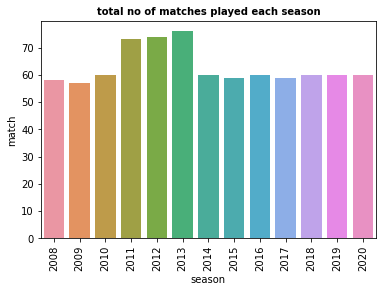

In [12]:
#total no of matches played each season
match_per_season = match_data.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'match','season':'season'})
#plt.pie(match_per_season.season,match_per_season.match,autopct='%.1f%%')
#plt.show()
sns.barplot(x='season',y='match',data=match_per_season)
plt.title('total no of matches played each season',fontsize=10,fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [13]:
#add season in ball_data 
season_data=match_data[['id','season']].merge(ball_data,left_on='id',right_on='id',how='left').drop('id',axis=1)
season_data

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


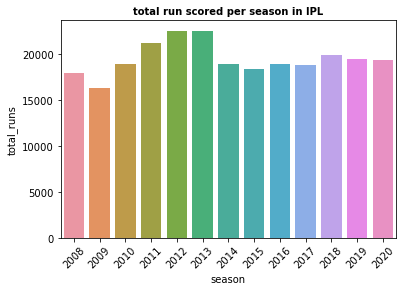

In [14]:
#total run scored each season
season_run1=season_data.groupby(['season'])['total_runs'].sum().reset_index()
sns.barplot(x='season',y='total_runs',data=season_run1)
#plt.plot(season_run1.season,season_run1.total_runs,color='g')
#plt.ylabel('total runs',fontsize=10)
#plt.xlabel('season run',fontsize=10)
plt.xticks(rotation=45)
plt.title('total run scored per season in IPL',fontsize=10,fontweight='bold')
plt.show()


In [15]:
#run score per match each season
run_per_match=pd.concat([season_run1,match_per_season.iloc[:,1]],axis=1)
run_per_match['run scored per match']=season_run1['total_runs']/match_per_season['match']
#run_per_match.set_index('season',inplace=True)
run_per_match

,season,total_runs,match,run scored per match
0,2008,17937,58,309.258621
1,2009,16320,57,286.315789
2,2010,18864,60,314.400000
3,2011,21154,73,289.780822
4,2012,22453,74,303.418919
5,2013,22541,76,296.592105
6,2014,18909,60,315.150000
7,2015,18332,59,310.711864
8,2016,18862,60,314.366667
9,2017,18769,59,318.118644


In [16]:
#no of tosses won by each team
tosses_won=match_data.groupby(['toss_winner'])['id'].count().reset_index()
tosses_won.rename(columns={'toss_winner':'team name','id':'no of times'},inplace=True)
#tosses_won.loc[1]='no of times'
#tosses_won['team name']=tosses_won.set_index()
tosses_won

,team name,no of times
0,Chennai Super Kings,97
1,Deccan Chargers,43
2,Delhi Capitals,20
3,Delhi Daredevils,80
4,Gujarat Lions,15
5,Kings XI Punjab,85
6,Kochi Tuskers Kerala,8
7,Kolkata Knight Riders,98
8,Mumbai Indians,106
9,Pune Warriors,20


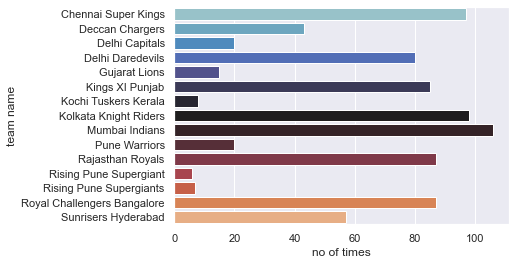

In [17]:
tosses_won=match_data.groupby(['toss_winner'])['id'].count().reset_index()
tosses_won.rename(columns={'toss_winner':'team name','id':'no of times'},inplace=True)
sns.set(style='darkgrid')
#ax=plt.axes()
#ax.set(facecolor='grey')
#tosses_won.loc[1]='no of times'
#tosses_won['team name']=tosses_won.set_index()
#tosses_won
sns.barplot(x='no of times',y='team name',data=tosses_won,palette='icefire')
#plt.xticks(rotation=90)
plt.show()

In [18]:
#tosses_won=match_data.groupby(['toss_winner'])['id'].count().reset_index().rename(columns={'toss_winner':'team name','id':'no of times'})
#tosses_won.rename(columns={'toss_winner':'f','id':'no of times'},inplace=True)
#plt.bar(tosses_won['team name'],tosses_won['no of times'],color='g')
#plt.xlabel('team',fontsize=10)
#plt.ylabel('no of times',fontsize=10)
#a=sns.color_palette('bright')
#sns.plot(x='team name',y='no of times',data=tosses_won)
#plt.xticks(rotation=90)
#plt.title('toss won by each team',fontsize=10,fontweight='bold')
#plt.show()


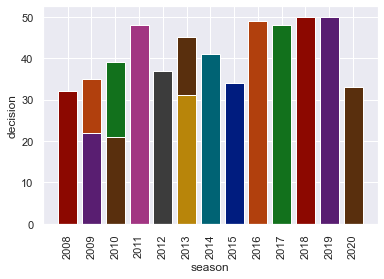

In [19]:
#toss decision across season
toss_dec=match_data.groupby(['toss_decision','season'])['id'].count().reset_index().rename(columns={'toss_decision':'toss_decision','season':'season','id':'no of time'})
a=sns.color_palette('dark')
#sns.barplot(x='toss_decision',y='season',hue='no of time',da)
plt.bar(toss_dec['season'],toss_dec['no of time'],color=a)
plt.xlabel('season')
plt.ylabel('decision')
plt.xticks(rotation=90)
plt.show()
#toss_dec

In [20]:
#match result
match_data['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [21]:
#stadium 
match_data.venue[match_data.result!='runs'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [22]:
#best stadium when win the toss
match_data.venue[match_data.toss_winner=='Kolkata Knight Riders'][match_data.winner=='Kolkata Knight Riders'].mode()

0    Eden Gardens
Name: venue, dtype: object

In [23]:
#best chasing team
match_data.winner[match_data.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
Name: winner, dtype: object

In [24]:
#thus winning the toss so winning the match


In [25]:
#thus choosing batting or balling win the match